### ML Project Phase 2
### Srilekha Somanchi, AM.EN.U4CSE19254

### 1. Data pre-processing

### a) Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ml Project/airline_train-1.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Ml Project/airline_test-1.csv')
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df.shape

(25974, 25)

In [6]:
df1.shape

(6492, 25)

#### Converting the output binary class to 0 and 1 in both the test and train sets.

In [7]:
new_values = []
for x in df['satisfaction']:
    if (x == 'satisfied'):
        new_values.append(1)
    else:
        new_values.append(0)
df['satisfaction'] = new_values

In [8]:
df['satisfaction'].head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [9]:
new_values = []
for x in df1['satisfaction']:
    if (x == 'satisfied'):
        new_values.append(1)
    else:
        new_values.append(0)
df1['satisfaction'] = new_values

In [10]:
df1['satisfaction'].head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64

In [11]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [12]:
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


#### Converting the string features to numeric in both training and testing sets.

In [13]:
df[['satisfaction','Gender']].groupby('Gender').mean()

,satisfaction
Gender,
Female,0.432678
Male,0.442449


In [14]:
l1 = []
for x in df['Gender']:
    if (x == 'Male'):
        l1.append(1)
    else:
        l1.append(0)
df['Gender'] = l1 

In [15]:
df1[['satisfaction','Gender']].groupby('Gender').mean()

,satisfaction
Gender,
Female,0.424102
Male,0.449449


In [16]:
l1 = []
for x in df1['Gender']:
    if (x == 'Male'):
        l1.append(1)
    else:
        l1.append(0)
df1['Gender'] = l1 

In [17]:
df[['satisfaction','Customer Type']].groupby('Customer Type').mean()

,satisfaction
Customer Type,
Loyal Customer,0.480024
disloyal Customer,0.246030


In [18]:
l2 = []
for x in df['Customer Type']:
    if (x == 'Loyal Customer'):
        l2.append(1)
    else:
        l2.append(0)
df['Customer Type'] = l2

In [19]:
df1[['satisfaction','Customer Type']].groupby('Customer Type').mean()

,satisfaction
Customer Type,
Loyal Customer,0.481194
disloyal Customer,0.241465


In [20]:
l2 = []
for x in df1['Customer Type']:
    if (x == 'Loyal Customer'):
        l2.append(1)
    else:
        l2.append(0)
df1['Customer Type'] = l2

In [21]:
df[['satisfaction','Type of Travel']].groupby('Type of Travel').mean()

,satisfaction
Type of Travel,
Business travel,0.587933
Personal Travel,0.103914


In [22]:
l3 = []
for x in df['Type of Travel']:
    if (x == 'Business travel'):
        l3.append(1)
    else:
        l3.append(0)
df['Type of Travel'] = l3

In [23]:
df1[['satisfaction','Type of Travel']].groupby('Type of Travel').mean()

,satisfaction
Type of Travel,
Business travel,0.584049
Personal Travel,0.094726


In [24]:
l3 = []
for x in df1['Type of Travel']:
    if (x == 'Business travel'):
        l3.append(1)
    else:
        l3.append(0)
df1['Type of Travel'] = l3

In [25]:
df[['satisfaction','Class']].groupby('Class').mean()

,satisfaction
Class,
Business,0.695863
Eco,0.193375
Eco Plus,0.257825


In [26]:
l4 = []
for x in df['Class']:
    if (x == 'Business'):
        l4.append(1)
    elif(x == 'Eco'):
        l4.append(0)
    else:
        l4.append(-1)
df['Class'] = l4

In [27]:
df1[['satisfaction','Class']].groupby('Class').mean()

,satisfaction
Class,
Business,0.691496
Eco,0.189255
Eco Plus,0.265136


In [28]:
l4 = []
for x in df1['Class']:
    if (x == 'Business'):
        l4.append(1)
    elif(x == 'Eco'):
        l4.append(0)
    else:
        l4.append(-1)
df1['Class'] = l4

### Dropping unwanted columns

In [44]:
df2 = df.drop('Unnamed: 0', axis=1)

In [45]:
df3 = df1.drop('Unnamed: 0', axis=1)

In [46]:
df2 = df2.drop('id', axis=1)

In [47]:
df3 = df3.drop('id', axis=1)

In [48]:
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,-1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [49]:
df3.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,52,1,0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,0,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,0,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [50]:
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,1,52,1,0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,0,1,36,1,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,1,0,20,1,0,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,1,1,44,1,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,0,1,49,1,0,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


### Imputing Missing values

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25974 non-null  int64  
 1   Customer Type                      25974 non-null  int64  
 2   Age                                25974 non-null  int64  
 3   Type of Travel                     25974 non-null  int64  
 4   Class                              25974 non-null  int64  
 5   Flight Distance                    25974 non-null  int64  
 6   Inflight wifi service              25974 non-null  int64  
 7   Departure/Arrival time convenient  25974 non-null  int64  
 8   Ease of Online booking             25974 non-null  int64  
 9   Gate location                      25974 non-null  int64  
 10  Food and drink                     25974 non-null  int64  
 11  Online boarding                    25974 non-null  int

In [52]:
df2.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             62
satisfaction                          0
dtype: int64

In [53]:
# Replacing the null values with the the mean of all the remaining values
df2['Arrival Delay in Minutes'].fillna(df2['Arrival Delay in Minutes'].mean(), inplace=True)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25974 non-null  int64  
 1   Customer Type                      25974 non-null  int64  
 2   Age                                25974 non-null  int64  
 3   Type of Travel                     25974 non-null  int64  
 4   Class                              25974 non-null  int64  
 5   Flight Distance                    25974 non-null  int64  
 6   Inflight wifi service              25974 non-null  int64  
 7   Departure/Arrival time convenient  25974 non-null  int64  
 8   Ease of Online booking             25974 non-null  int64  
 9   Gate location                      25974 non-null  int64  
 10  Food and drink                     25974 non-null  int64  
 11  Online boarding                    25974 non-null  int

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6492 non-null   int64  
 1   Customer Type                      6492 non-null   int64  
 2   Age                                6492 non-null   int64  
 3   Type of Travel                     6492 non-null   int64  
 4   Class                              6492 non-null   int64  
 5   Flight Distance                    6492 non-null   int64  
 6   Inflight wifi service              6492 non-null   int64  
 7   Departure/Arrival time convenient  6492 non-null   int64  
 8   Ease of Online booking             6492 non-null   int64  
 9   Gate location                      6492 non-null   int64  
 10  Food and drink                     6492 non-null   int64  
 11  Online boarding                    6492 non-null   int64

In [56]:
df3.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             23
satisfaction                          0
dtype: int64

In [57]:
df3['Arrival Delay in Minutes'].fillna(df3['Arrival Delay in Minutes'].mean(), inplace=True)

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6492 entries, 0 to 6491
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6492 non-null   int64  
 1   Customer Type                      6492 non-null   int64  
 2   Age                                6492 non-null   int64  
 3   Type of Travel                     6492 non-null   int64  
 4   Class                              6492 non-null   int64  
 5   Flight Distance                    6492 non-null   int64  
 6   Inflight wifi service              6492 non-null   int64  
 7   Departure/Arrival time convenient  6492 non-null   int64  
 8   Ease of Online booking             6492 non-null   int64  
 9   Gate location                      6492 non-null   int64  
 10  Food and drink                     6492 non-null   int64  
 11  Online boarding                    6492 non-null   int64

### Converting the cleaned data to csv file 

In [59]:
new_filename =  '/content/drive/MyDrive/Ml Project/modified_airline_train-1.csv'
df2.to_csv(new_filename)

In [60]:
new_filename =  '/content/drive/MyDrive/Ml Project/modified_airline_test-1.csv'
df3.to_csv(new_filename)

### Splitting Data

In [61]:
X = df2[df2.columns[0: len(df2.columns) - 1]].values
y = df2[df2.columns[-1]].values

In [62]:
X.shape
#Y.shape

(25974, 22)

In [63]:
print(df2)

       Gender  Customer Type  ...  Arrival Delay in Minutes  satisfaction
0           1              1  ...                      18.0             0
1           1              0  ...                       6.0             0
2           0              1  ...                       0.0             1
3           0              1  ...                       9.0             0
4           1              1  ...                       0.0             1
...       ...            ...  ...                       ...           ...
25969       1              1  ...                       0.0             0
25970       0              0  ...                     131.0             0
25971       0              0  ...                       0.0             0
25972       1              1  ...                       0.0             0
25973       1              1  ...                       0.0             1

[25974 rows x 23 columns]


In [64]:
df2.shape

(25974, 23)

In [65]:
df2.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### b) Standardization

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [58]:
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
scaler.mean_

array([4.91029491e-01, 8.18164318e-01, 3.92017402e+01, 6.89150689e-01,
       4.03903904e-01, 1.19119069e+03, 2.73304073e+00, 3.06136906e+00,
       2.75633326e+00, 2.96746747e+00, 3.20674521e+00, 3.24462924e+00,
       3.43451143e+00, 3.35547086e+00, 3.37706938e+00, 3.33995534e+00,
       3.63374913e+00, 3.31077231e+00, 3.64014014e+00, 3.28667129e+00,
       1.48093863e+01, 1.52188175e+01])

In [60]:
scaler.scale_

array([4.99919523e-01, 3.85709044e-01, 1.50819951e+01, 4.62841244e-01,
       6.21217100e-01, 1.00082756e+03, 1.33187297e+00, 1.53258513e+00,
       1.39958459e+00, 1.28539830e+00, 1.33434038e+00, 1.34965789e+00,
       1.31975215e+00, 1.33300033e+00, 1.28551020e+00, 1.31463843e+00,
       1.18138027e+00, 1.26550514e+00, 1.17874633e+00, 1.31787419e+00,
       3.73363327e+01, 3.78817258e+01])

In [61]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.01810488,  0.47143225, -1.73728608, ...,  1.30007001,
         0.27294094,  0.07341752],
       [ 1.01810488, -2.12119558, -0.94163538, ..., -1.73512107,
        -0.36986456, -0.24335791],
       [-0.98221707,  0.47143225, -0.87533115, ...,  1.30007001,
        -0.39664812, -0.40174562],
       ...,
       [-0.98221707, -2.12119558, -0.4775058 , ..., -0.9763233 ,
        -0.39664812, -0.40174562],
       [ 1.01810488,  0.47143225,  0.64966602, ..., -0.21752553,
        -0.39664812, -0.40174562],
       [ 1.01810488,  0.47143225,  1.04749137, ...,  0.54127224,
        -0.39664812, -0.40174562]])

#### The scaled data has zero mean and unit variance which is proved below:

In [62]:
type(X_scaled)

numpy.ndarray

In [63]:
X_scaled.mean(axis=0)

array([-2.57145673e-17,  1.72342313e-16,  7.44764995e-17,  4.71889666e-17,
        5.58060823e-17,  4.36326967e-17,  1.16536231e-16,  9.30101371e-18,
       -1.50184016e-16, -1.23101652e-17, -1.19682162e-16,  1.02584710e-19,
        1.75077905e-17,  3.06386334e-17, -6.37392999e-17, -1.05730641e-16,
       -1.62972909e-16,  9.95755586e-17,  1.81916886e-17, -1.34044021e-16,
        1.28572837e-17, -3.85718510e-17])

In [64]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

### c) Normalization - the process of scaling individual samples to have unit norm. 

In [65]:
from sklearn.preprocessing import Normalizer
normalizer = preprocessing.Normalizer().fit(X)
normalizer

Normalizer(copy=True, norm='l2')

In [66]:
X_norm = normalizer.transform(X)

In [67]:
type(X_norm)

numpy.ndarray

In [68]:
X_norm[:2, :]

array([[ 0.00216703,  0.00216703,  0.02817135,  0.        , -0.00216703,
         0.99683222,  0.00650108,  0.00866811,  0.00650108,  0.00216703,
         0.01083513,  0.00650108,  0.01083513,  0.01083513,  0.00866811,
         0.00650108,  0.00866811,  0.00866811,  0.01083513,  0.01083513,
         0.05417566,  0.03900648],
       [ 0.0042263 ,  0.        ,  0.10565749,  0.0042263 ,  0.0042263 ,
         0.9931804 ,  0.0126789 ,  0.0084526 ,  0.0126789 ,  0.0126789 ,
         0.0042263 ,  0.0126789 ,  0.0042263 ,  0.0042263 ,  0.0042263 ,
         0.0211315 ,  0.0126789 ,  0.0042263 ,  0.0169052 ,  0.0042263 ,
         0.0042263 ,  0.0253578 ]])

### 2. Data Summarization

#### a) using groupby

In [99]:
# calculating the max average delay of male and female customers grouped by age and gender
x = df2.groupby(['Age', 'Gender'])['Arrival Delay in Minutes'].mean()
print(x.tail())

Age  Gender
79   0          1.000000
     1         60.833333
80   0         11.000000
     1          5.777778
85   1          3.500000
Name: Arrival Delay in Minutes, dtype: float64


In [100]:
print(x.max())

60.833333333333336


#### b) counting number of records

In [101]:
# value_counts returns the count of number of records for each category in a column
df2['satisfaction'].value_counts()

0    14611
1    11363
Name: satisfaction, dtype: int64

#### c) getting the description of the data (statistical information)

In [102]:
df2.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000,25974.000000
mean,0.491029,0.818164,39.201740,0.689151,0.403904,1191.190691,2.733041,3.061369,2.756333,2.967467,3.206745,3.244629,3.434511,3.355471,3.377069,3.339955,3.633749,3.310772,3.640140,3.286671,14.809386,15.218818,0.437476
std,0.499929,0.385716,15.082285,0.462850,0.621229,1000.846823,1.331899,1.532615,1.399612,1.285423,1.334366,1.349684,1.319778,1.333026,1.285535,1.314664,1.181403,1.265530,1.178769,1.317900,37.337051,37.882455,0.496085
min,0.000000,0.000000,7.000000,0.000000,-1.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,412.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,0.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,14.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,1.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000


### Data Visualization

#### a) Correlation Matrix

In [167]:
corr = df2.corr()
np.fill_diagonal(corr.values, 0)
corr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,0.000000,0.034369,-0.004448,-0.006061,0.014456,0.010901,0.006118,0.003281,0.000810,0.000714,0.003300,-0.039201,-0.030563,0.006605,0.003826,0.033755,0.035864,0.009883,0.035192,0.007234,0.011124,0.008475,0.009847
Customer Type,0.034369,0.000000,0.281757,-0.308208,0.036737,0.228726,0.007731,0.214396,0.018269,-0.006030,0.068706,0.186991,0.164213,0.116357,0.061411,0.050386,-0.033611,0.031690,-0.028251,0.092021,-0.005751,-0.004928,0.181936
Age,-0.004448,0.281757,0.000000,0.058980,0.117666,0.095539,0.018225,0.035345,0.021352,-0.005768,0.029050,0.211290,0.169327,0.079196,0.055766,0.041066,-0.050646,0.038333,-0.051798,0.061013,-0.009632,-0.010241,0.136918
Type of Travel,-0.006061,-0.308208,0.058980,0.000000,0.485008,0.268810,0.108457,-0.265924,0.132217,0.033672,0.065036,0.223362,0.122606,0.148397,0.045454,0.143745,0.032029,-0.026872,0.023675,0.078745,0.011712,0.010294,0.451593
Class,0.014456,0.036737,0.117666,0.485008,0.000000,0.430154,0.024414,-0.091626,0.097476,0.007006,0.079193,0.289777,0.201952,0.177917,0.209386,0.205660,0.165214,0.151800,0.159692,0.126056,-0.003533,-0.007555,0.441811
Flight Distance,0.010901,0.228726,0.095539,0.268810,0.430154,0.000000,0.011383,-0.015765,0.068643,0.007944,0.062978,0.211404,0.150672,0.132105,0.110593,0.132597,0.064468,0.063893,0.057791,0.097324,0.005702,0.000935,0.300602
Inflight wifi service,0.006118,0.007731,0.018225,0.108457,0.024414,0.011383,0.000000,0.340364,0.708515,0.335336,0.132941,0.462801,0.122568,0.207504,0.116449,0.162103,0.118927,0.041387,0.110274,0.134146,-0.015923,-0.017940,0.286952
Departure/Arrival time convenient,0.003281,0.214396,0.035345,-0.265924,-0.091626,-0.015765,0.340364,0.000000,0.437493,0.447051,-0.006110,0.068310,0.001854,-0.008624,0.071873,0.020487,0.071890,0.088467,0.076010,0.011209,-0.000729,-0.002368,-0.055771
Ease of Online booking,0.000810,0.018269,0.021352,0.132217,0.097476,0.068643,0.708515,0.437493,0.000000,0.458658,0.023883,0.400789,0.023533,0.043228,0.038185,0.113277,0.041074,0.008844,0.042157,0.015015,-0.001273,-0.003463,0.170502
Gate location,0.000714,-0.006030,-0.005768,0.033672,0.007006,0.007944,0.335336,0.447051,0.458658,0.000000,-0.006023,-0.000095,-0.006056,0.006300,-0.021887,-0.003867,0.004780,-0.034943,0.013821,-0.006199,0.002802,0.001134,0.002093


#### Correlation matrix using heatmap

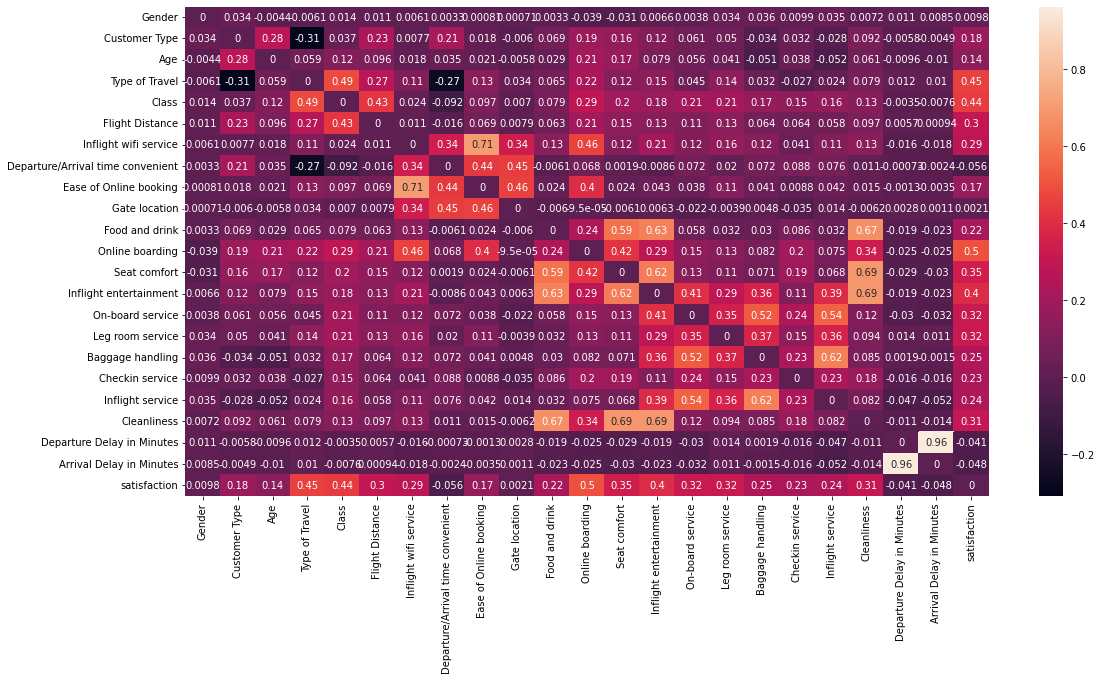

In [169]:
plt.figure(figsize = (18,9))
sns.heatmap(corr, annot=True)

#### Finding the strongest correlations between all the features

In [170]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='first')

Customer Type                      Type of Travel               -0.308208
Departure/Arrival time convenient  Type of Travel               -0.265924
                                   Class                        -0.091626
                                   satisfaction                 -0.055771
Arrival Delay in Minutes           Inflight service             -0.051914
                                                                   ...   
Food and drink                     Cleanliness                   0.666021
Seat comfort                       Cleanliness                   0.686245
Inflight entertainment             Cleanliness                   0.693375
Ease of Online booking             Inflight wifi service         0.708515
Arrival Delay in Minutes           Departure Delay in Minutes    0.962557
Length: 254, dtype: float64

#### Finding strongest correlations of features w.r.t target (satisfaction) 

In [171]:
df.corr().abs()['satisfaction'].sort_values(ascending = False)

satisfaction                         1.000000
Online boarding                      0.500636
Type of Travel                       0.451593
Class                                0.441811
Inflight entertainment               0.395952
Seat comfort                         0.346111
On-board service                     0.319210
Leg room service                     0.318202
Cleanliness                          0.307143
Flight Distance                      0.300602
Inflight wifi service                0.286952
Baggage handling                     0.246792
Inflight service                     0.241575
Checkin service                      0.225909
Food and drink                       0.218039
Customer Type                        0.181936
Ease of Online booking               0.170502
Age                                  0.136918
Departure/Arrival time convenient    0.055771
Arrival Delay in Minutes             0.047906
Departure Delay in Minutes           0.040964
id                                

#### b) Feature Visualization using boxplot

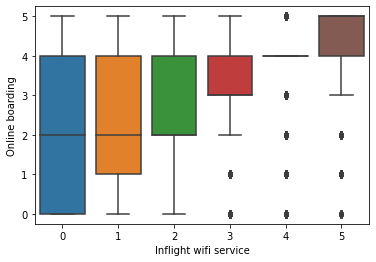

In [172]:
sns.boxplot(x='Inflight wifi service', y='Online boarding', data=df2)

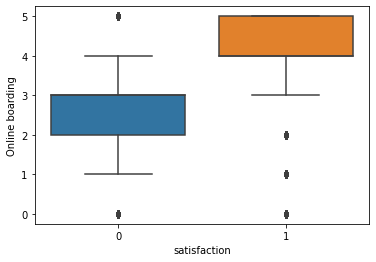

In [173]:
sns.boxplot(x='satisfaction', y='Online boarding', data=df2)

#### c) Feature Visualization using lmplot

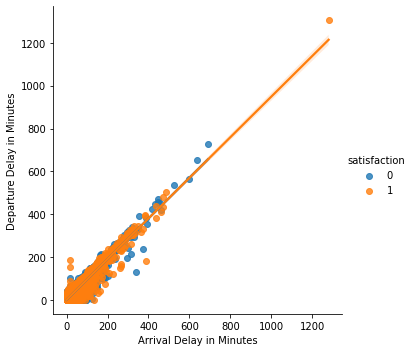

In [174]:
sns.lmplot(x='Arrival Delay in Minutes', y='Departure Delay in Minutes', 
                hue='satisfaction', data=df2)

#### d) Feature Visualization using scatterplot

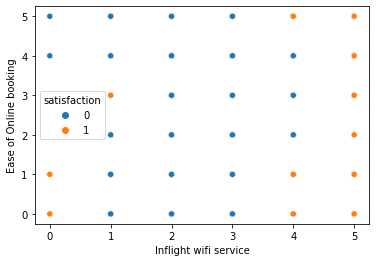

In [175]:
sns.scatterplot(x='Inflight wifi service', y='Ease of Online booking', 
                hue='satisfaction', data=df2)

#### e) 3D visualization of 3 highly correlated features and passenger satisfaction using ploty 

In [176]:
import plotly.express as px

fig = px.scatter_3d(df2.head(1000), x='On-board service', y='Leg room service', z='Cleanliness', 
                   color='satisfaction')
fig.show()

In [177]:
import plotly.express as px

fig = px.scatter_3d(df2.head(1000), x='Online boarding', y='Inflight entertainment', z='Seat comfort', 
                   color='satisfaction')
fig.show()

### Prediction using Ml algorithms

### Implementation of Decision Tree Algorithm

In [66]:
from collections import Counter

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
        
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if(depth >= self.max_depth
          or n_labels == 1
          or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        
        # greedy approach
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)
        
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
                    
        return split_idx, split_thresh
    
    def _information_gain(self, y, X_column, split_thresh):
        # parent Entropy
        parent_entropy = entropy(y)
        
        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # weighted avg of child E
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
        
        # return ig
        ig = parent_entropy - child_entropy
        return ig
    
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
        
    def _most_common_label(self, y):
        counter = Counter(y) 
        most_common = counter.most_common(1)[0][0]
        return most_common
    
    def predict(self, X):
        # traverse tree
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        # check for stopping criteria
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

In [67]:
X.shape

(25974, 22)

In [68]:
# predicting accuracy using DecisionTree class built from scratch

from sklearn.model_selection import train_test_split

def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
#print(X_train, y_train)
#type(X_train)
#print(X_train.shape)
#print(X_test.shape)

clf = DecisionTree(max_depth=10)
print(clf)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc1 = accuracy(y_test, y_pred)

print("Accuracy: ", acc1)

Accuracy:  0.9357074109720885


#### Confusion matrix for DT 

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2784  186]
 [ 148 2077]]


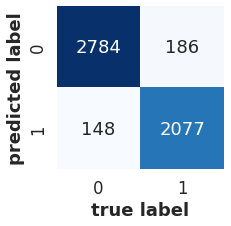

In [70]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, 
                     cbar=False,
                    fmt='g', # not to use scientific notation
                    cmap='Blues')
    
    plt.xlabel("true label", weight='bold')
    plt.ylabel("predicted label", weight='bold')
    
plot_conf_mat(y_test, y_pred)

In [101]:
# predicting accuracy using DecisionTree class built from scratch using normalized data

from sklearn.model_selection import train_test_split

def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=1234)
#print(X_train, y_train)
#type(X_train)
#print(X_train.shape)
#print(X_test.shape)

clf = DecisionTree(max_depth=10)
print(clf)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.887776708373436


In [182]:
# predicting accuracy using DecisionTree class built from scratch using standardized data

from sklearn.model_selection import train_test_split

def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)
#print(X_train, y_train)
#type(X_train)
#print(X_train.shape)
#print(X_test.shape)

clf = DecisionTree(max_depth=10)
print(clf)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.9143407122232916


### Using inbuilt decision tree classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9384023099133783


In [55]:
X_train.shape

(20779, 22)

### Splitting the dataset using KFold cross validation

#### a) Partitioning and K-fold Cross Validation

In [72]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=None) 
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

In [73]:
# predicting accuracy using sklearn inbuilt DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.931651906045437


#### b) Stratified k-fold cross validation

In [75]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

In [76]:
from sklearn.tree import DecisionTreeClassifier

def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.9337697343088178


#### c) Repeated k-fold cross validation with repetition

In [77]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

In [78]:
from sklearn.tree import DecisionTreeClassifier

def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy: ", acc)

Accuracy:  0.9331921447824413


### Random Forest  

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [83]:
pred_val = rf.predict(X_test)
pred_val

array([1, 0, 1, ..., 1, 0, 1])

In [84]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, pred_val)
print(acc2)

0.9539942252165544


#### Confusion matrix for RF

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_val)
print(cm)

[[2877   93]
 [ 146 2079]]


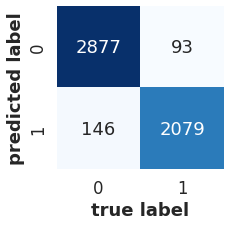

In [86]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, pred_val):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, pred_val),
                     annot=True, 
                     cbar=False,
                    fmt='g', # not to use scientific notation
                    cmap='Blues')
    
    plt.xlabel("true label", weight='bold')
    plt.ylabel("predicted label", weight='bold')
    
plot_conf_mat(y_test, pred_val)

### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_test, y_pred)
print(acc3)

0.6939364773820982


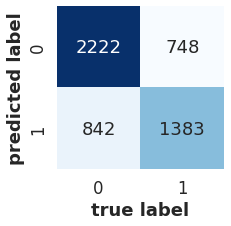

In [90]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, 
                     cbar=False,
                    fmt='g', # not to use scientific notation
                    cmap='Blues')
    
    plt.xlabel("true label", weight='bold')
    plt.ylabel("predicted label", weight='bold')
    
plot_conf_mat(y_test, y_pred)

#### Confusion matrix for KNN

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2222  748]
 [ 842 1383]]


### Evaluating the models on test set 

In [92]:
X = df3[df3.columns[0: len(df3.columns) - 1]].values
y = df3[df3.columns[-1]].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Graph for comparing accuracy of all 3 algorithms

In [97]:
models = {'KNN': KNeighborsClassifier(),
          'Decision Tree' : DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Decision Tree': 0.9299461123941494,
 'KNN': 0.6404926866820632,
 'Random Forest': 0.9499615088529638}

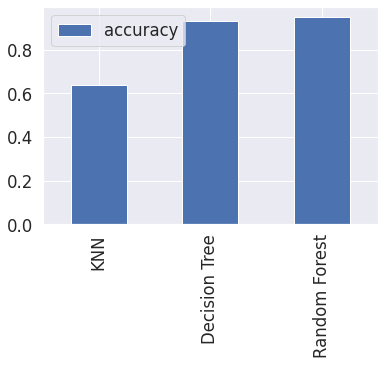

In [98]:
model_comp = pd.DataFrame(model_scores, index=['accuracy'])
model_comp.T.plot.bar();